# Deep Learning Classification on Chest X-ray Images with CNN, ResNet parallelized on GPU

## Part 1: Data Preprocessing
Before we apply our CNN and ResNet models, we should make the images to the same size and same suffix. This part is mainly about image preprocessing.
### 1.1 Resize all the image size to 128x128
Done this part in localhost and uploaded to colab.

### 1.2 Loading all images in a numpy array with labels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img
from numpy import asarray
import time
import multiprocessing as mp
%matplotlib inline

In [2]:
#img = Image.open('Sample.png')
#numpydata = asarray(img)
from PIL import Image
import os.path
import glob
def load_image_from_folder(path, basewidth, hsize):
    # creating temp array
    image_array = []
    labels = []
    i = 0
    # directory walking started
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if file != []:
                # trying to get path of each images
                path_updated = os.path.join(subdir, file)
                # fetching lables from directory names
                label = subdir.split('/')[-1]
                if label == 'NORMAL':
                    labels.append(0)
                if label == 'PNEUMONIA':
                    labels.append(1)
                # Converting image & resizing it
                img = Image.open(path_updated).convert('L')
                img = img.resize((basewidth, hsize), Image.ANTIALIAS)
                frame = asarray(img)
                # appending array of image in temp array
                image_array.append(frame)
  
    # Now i have to convert this images to array channel format which can be done using zero matrix
    # creating a dummy zero matrix of same shape with single channel
    
    image_array1 = np.zeros(shape=(np.array(image_array).shape[0], hsize, basewidth, 1))
    for i in range(np.array(image_array).shape[0]):
        # finally each sub matrix will be replaced with respective images array
        image_array1[i, :, :, 0] = image_array[i]
    
    return image_array1, np.array(labels)
start1_def = time.time()
pool = mp.Pool(1)
train_images, train_labels = pool.apply(load_image_from_folder, args=(r'/home/jiang.zif/FinalProject/cleaned_data/train', 128, 128))
#train_images, train_labels = load_image_from_folder(r"E:\NEU\Courses\22Spring\CSYE7105_Parallel ML and AI\Final Project\cleaned_data\train", 128, 128)
test_images, test_labels = pool.apply(load_image_from_folder, args=(r'/home/cleaned_data/test', 128, 128))
pool.close()
end1_def = time.time()
tdef1 = end1_def - start1_def
print("The elapsed time for the reading data using one CPU is:",tdef1)

The elapsed time for the reading data using one CPU is: 6.891961574554443


In [3]:
start2_def = time.time()
pool = mp.Pool(2)
train_images, train_labels = pool.apply(load_image_from_folder, args=(r'/home/jiang.zif/FinalProject/cleaned_data/train', 128, 128))
#train_images, train_labels = load_image_from_folder(r"E:\NEU\Courses\22Spring\CSYE7105_Parallel ML and AI\Final Project\cleaned_data\train", 128, 128)
test_images, test_labels = pool.apply(load_image_from_folder, args=(r'/home/jiang.zif/FinalProject/cleaned_data/test', 128, 128))
pool.close()
end2_def = time.time()
tdef2 = end2_def - start2_def
print("The elapsed time for the reading data using 2 CPUs is:",tdef2)

The elapsed time for the reading data using 2 CPUs is: 5.289403676986694


In [4]:
start4_def = time.time()
pool = mp.Pool(4)
train_images, train_labels = pool.apply(load_image_from_folder, args=(r'/home/jiang.zif/FinalProject/cleaned_data/train', 128, 128))
#train_images, train_labels = load_image_from_folder(r"E:\NEU\Courses\22Spring\CSYE7105_Parallel ML and AI\Final Project\cleaned_data\train", 128, 128)
test_images, test_labels = pool.apply(load_image_from_folder, args=(r'/home/jiang.zif/FinalProject/cleaned_data/test', 128, 128))
pool.close()
end4_def = time.time()
tdef4 = end4_def - start4_def
print("The elapsed time for the reading data using 4 CPUs is:",tdef4)

The elapsed time for the reading data using 4 CPUs is: 5.077673435211182


In [5]:
start8_def = time.time()
pool = mp.Pool(8)
train_images, train_labels = pool.apply(load_image_from_folder, args=(r'/home/jiang.zif/FinalProject/cleaned_data/train', 128, 128))
#train_images, train_labels = load_image_from_folder(r"E:\NEU\Courses\22Spring\CSYE7105_Parallel ML and AI\Final Project\cleaned_data\train", 128, 128)
test_images, test_labels = pool.apply(load_image_from_folder, args=(r'/home/jiang.zif/FinalProject/cleaned_data/test', 128, 128))
pool.close()
end8_def = time.time()
tdef8 = end8_def - start8_def
print("The elapsed time for the reading data using 8 CPUs is:",tdef8)

The elapsed time for the reading data using 8 CPUs is: 5.045602083206177


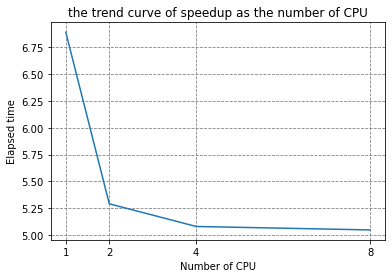

In [6]:
plt.plot([1, 2, 4, 8], [tdef1, tdef2, tdef4, tdef8])
plt.xticks([1, 2, 4, 8])
plt.title("the trend curve of speedup as the number of CPU")
plt.xlabel("Number of CPU")
plt.ylabel("Elapsed time")
plt.grid(color = 'grey', linestyle = 'dashed')
plt.savefig("mpread.png")
plt.show()

### 1.3 Changing all the numpy arrays to dask array

In [7]:
import dask.array as da
train_images_dask = da.asarray(train_images)
test_images_dask = da.asarray(test_images)
print(train_images_dask.compute())
print(test_images_dask.compute())

[[[[ 1.]
   [ 0.]
   [ 0.]
   ...
   [ 1.]
   [ 1.]
   [ 0.]]

  [[ 1.]
   [ 0.]
   [ 0.]
   ...
   [ 1.]
   [ 1.]
   [ 0.]]

  [[ 1.]
   [ 0.]
   [ 0.]
   ...
   [ 1.]
   [ 1.]
   [ 0.]]

  ...

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 2.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 2.]]

  [[ 0.]
   [ 0.]
   [ 0.]
   ...
   [ 0.]
   [ 0.]
   [ 2.]]]


 [[[48.]
   [46.]
   [46.]
   ...
   [77.]
   [76.]
   [75.]]

  [[48.]
   [46.]
   [46.]
   ...
   [77.]
   [75.]
   [74.]]

  [[48.]
   [46.]
   [46.]
   ...
   [76.]
   [74.]
   [73.]]

  ...

  [[46.]
   [57.]
   [69.]
   ...
   [93.]
   [91.]
   [86.]]

  [[47.]
   [59.]
   [71.]
   ...
   [96.]
   [94.]
   [86.]]

  [[48.]
   [60.]
   [71.]
   ...
   [97.]
   [96.]
   [86.]]]


 [[[ 0.]
   [ 2.]
   [12.]
   ...
   [ 0.]
   [ 3.]
   [ 0.]]

  [[ 0.]
   [ 2.]
   [12.]
   ...
   [ 0.]
   [ 3.]
   [ 0.]]

  [[ 0.]
   [ 1.]
   [11.]
   ...
   [ 0.]
   [ 3.]
   [ 0.]]

  ...

  [[ 1.]
   [ 0.]
   [ 4.]
   

### 1.4 Normalize pixel values to be between 0 and 1
Compare the time between the dask array and numpy array

In [8]:
start1_numpy = time.time()
train_images, test_images = train_images / 255.0, test_images / 255.0
end1_numpy = time.time()
tn1 = end1_numpy - start1_numpy
print("The elapsed time for the numpy array normalization is:",tn1)

The elapsed time for the numpy array normalization is: 0.35271596908569336


In [9]:
start1_dask = time.time()
train_images_dask, test_images_dask = train_images_dask / 255.0, test_images_dask / 255.0
end1_dask = time.time()
td1 = end1_dask - start1_dask
print("The elapsed time for the dask array normalization is:",td1)

The elapsed time for the dask array normalization is: 0.007077217102050781


## Part 2: CNNs
In this part, we are going to build a CNN model using tensorflow.

The  model I built is a very basic CNN model with common structures with Maxpooling layers. 

Average pooling method smooths out the image and hence the sharp features may not be identified when this pooling method is used.
Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image.
### 2.1 model_CNN_GPU with One Device Strategy
Normal training without parallel

In [10]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Input
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from sklearn import preprocessing
from keras.regularizers import l2
from keras.models import Model
import seaborn as sns
from keras import backend as K

In [11]:
device_type = 'GPU'
devices = tf.config.experimental.list_physical_devices(device_type)
devices_names = [d.name.split("e:")[1] for d in devices]
devices_names

['GPU:0']

In [12]:
# initiate hyper-parameters
batch_size = 128
epochs = 20
data_augmentation = True
opt = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [13]:
K.clear_session()

strategy_1 = tf.distribute.OneDeviceStrategy(device = 'GPU:0')
with strategy_1.scope():
    model_CNN_v1 = Sequential()
    model_CNN_v1.add(Conv2D(32, (3, 3), padding = 'same',  # 32，(3,3) is the number and size of the convolution kernel
                      input_shape = train_images.shape[1:]))  # The first layer needs to indicate the size of the image
    model_CNN_v1.add(Activation('relu'))
    model_CNN_v1.add(Conv2D(32, (3, 3))) # Convolutional layer
    model_CNN_v1.add(Activation('relu'))
    model_CNN_v1.add(BatchNormalization())
    model_CNN_v1.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

    model_CNN_v1.add(Conv2D(64, (3, 3), padding='same')) # Convolutional layer
    model_CNN_v1.add(Activation('relu'))
    model_CNN_v1.add(Conv2D(64, (3, 3))) # Convolutional layer
    model_CNN_v1.add(Activation('relu'))
    model_CNN_v1.add(BatchNormalization())
    model_CNN_v1.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

    model_CNN_v1.add(Conv2D(128, (3, 3), padding='same')) # Convolutional layer
    model_CNN_v1.add(Activation('relu'))
    model_CNN_v1.add(Conv2D(128, (3, 3))) # Convolutional layer
    model_CNN_v1.add(Activation('relu'))
    model_CNN_v1.add(BatchNormalization())
    model_CNN_v1.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

    model_CNN_v1.add(Flatten())
    model_CNN_v1.add(Dense(512)) # Fully connected layer
    model_CNN_v1.add(Activation('relu'))
    model_CNN_v1.add(Dropout(0.5)) # Dropout layer
    model_CNN_v1.add(Dense(1)) # Output layer
    model_CNN_v1.add(Activation('sigmoid'))



    # Let's compile the model  
    model_CNN_v1.compile(loss = 'binary_crossentropy',
                    optimizer = opt,
                    metrics = ['accuracy'])

In [14]:
model_CNN_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                      

In [15]:
start1_CNN = time.time()
# Data_augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_CNN_v1 = model_CNN_v1.fit(train_images, train_labels,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = (test_images, test_labels),
              shuffle = True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_images)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_CNN_v1 = model_CNN_v1.fit(datagen.flow(train_images_dask, train_labels, batch_size = batch_size),
                        validation_data = (test_images_dask, test_labels),
                        epochs = epochs, verbose = 1)
end1_CNN = time.time()
t1 = end1_CNN - start1_CNN
print("The elapsed time for the parallelized code when using only one GPU is:",t1)

Using real-time data augmentation.
Epoch 1/20
41/41 [==============================] - 22s 428ms/step - loss: 0.4463 - accuracy: 0.8301 - val_loss: 0.6635 - val_accuracy: 0.6250
Epoch 2/20
41/41 [==============================] - 14s 347ms/step - loss: 0.2380 - accuracy: 0.9087 - val_loss: 0.6757 - val_accuracy: 0.6250
Epoch 3/20
41/41 [==============================] - 14s 348ms/step - loss: 0.2104 - accuracy: 0.9204 - val_loss: 0.7666 - val_accuracy: 0.6250
Epoch 4/20
41/41 [==============================] - 14s 347ms/step - loss: 0.1780 - accuracy: 0.9291 - val_loss: 0.8408 - val_accuracy: 0.6250
Epoch 5/20
41/41 [==============================] - 14s 347ms/step - loss: 0.1529 - accuracy: 0.9375 - val_loss: 0.9826 - val_accuracy: 0.6250
Epoch 6/20
41/41 [==============================] - 14s 348ms/step - loss: 0.1526 - accuracy: 0.9419 - val_loss: 1.2439 - val_accuracy: 0.6250
Epoch 7/20
41/41 [==============================] - 14s 348ms/step - loss: 0.1435 - accuracy: 0.9425 - val_

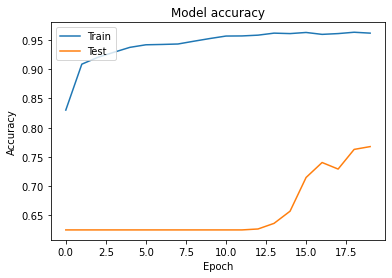

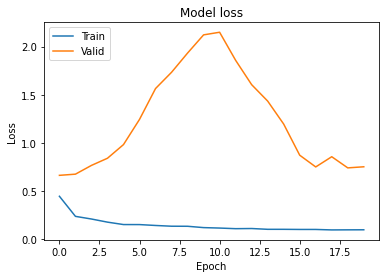

20/20 - 1s - loss: 0.7523 - accuracy: 0.7676 - 785ms/epoch - 39ms/step


In [16]:
# Plot the accuracy values of training and testing sets
plt.plot(history_CNN_v1.history['accuracy'])
plt.plot(history_CNN_v1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss values for training and testing sets
plt.plot(history_CNN_v1.history['loss']) 
plt.plot(history_CNN_v1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

test_loss, test_acc = model_CNN_v1.evaluate(test_images_dask,  test_labels, verbose = 2)

### 2.2 model_CNN GPU Mirrored Strategy

In [17]:
# initiate hyper-parameters
batch_size = 128
epochs = 20
data_augmentation = True
opt = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [18]:
K.clear_session() # Clear the memory occupied by the previous model to prevent OOM

strategy2 = tf.distribute.MirroredStrategy(devices = devices_names[:1])
with strategy2.scope():
    model_CNN_v2 = Sequential()
    model_CNN_v2.add(Conv2D(32, (3, 3), padding = 'same',  # 32，(5,5) is the number and size of the convolution kernel
                     input_shape = train_images.shape[1:]))  # The first layer needs to indicate the size of the image
    model_CNN_v2.add(Activation('relu'))
    model_CNN_v2.add(Conv2D(32, (3, 3))) # Convolutional layer
    model_CNN_v2.add(Activation('relu'))
    model_CNN_v2.add(BatchNormalization())
    model_CNN_v2.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

    model_CNN_v2.add(Conv2D(64, (3, 3), padding='same')) # Convolutional layer
    model_CNN_v2.add(Activation('relu'))
    model_CNN_v2.add(Conv2D(64, (3, 3))) # Convolutional layer
    model_CNN_v2.add(Activation('relu'))
    model_CNN_v2.add(BatchNormalization())
    model_CNN_v2.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

    model_CNN_v2.add(Conv2D(128, (3, 3), padding='same')) # Convolutional layer
    model_CNN_v2.add(Activation('relu'))
    model_CNN_v2.add(Conv2D(128, (3, 3))) # Convolutional layer
    model_CNN_v2.add(Activation('relu'))
    model_CNN_v2.add(BatchNormalization())
    model_CNN_v2.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer

    model_CNN_v2.add(Flatten())
    model_CNN_v2.add(Dense(512)) # Fully connected layer
    model_CNN_v2.add(Activation('relu'))
    model_CNN_v2.add(Dropout(0.5)) # Dropout layer
    model_CNN_v2.add(Dense(1)) # Output layer
    model_CNN_v2.add(Activation('sigmoid'))



    # Let's compile the model  
    model_CNN_v2.compile(loss = 'binary_crossentropy',
                  optimizer = opt,
                  metrics = ['accuracy'])


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/

In [19]:
start2_CNN = time.time()
# Data_augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_CNN_v2 = model_CNN_v2.fit(train_images, train_labels,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = (test_images, test_labels),
              shuffle = True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_images)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_CNN_v2 = model_CNN_v2.fit(datagen.flow(train_images_dask, train_labels, batch_size = batch_size),
                        validation_data = (test_images_dask, test_labels),
                        epochs = epochs, verbose = 1, workers = 2)
end2_CNN = time.time()
t2 = end2_CNN - start2_CNN
print("The elapsed time for the parallelized code when using Mirrored Strategy str GPU is:",t2)

Using real-time data augmentation.
Epoch 1/20
41/41 [==============================] - 19s 361ms/step - loss: 0.4361 - accuracy: 0.8336 - val_loss: 0.6628 - val_accuracy: 0.6250
Epoch 2/20
41/41 [==============================] - 15s 350ms/step - loss: 0.2524 - accuracy: 0.9061 - val_loss: 0.6605 - val_accuracy: 0.6250
Epoch 3/20
41/41 [==============================] - 15s 350ms/step - loss: 0.2009 - accuracy: 0.9250 - val_loss: 0.6881 - val_accuracy: 0.6250
Epoch 4/20
41/41 [==============================] - 15s 350ms/step - loss: 0.1772 - accuracy: 0.9283 - val_loss: 0.7200 - val_accuracy: 0.6250
Epoch 5/20
41/41 [==============================] - 15s 350ms/step - loss: 0.1643 - accuracy: 0.9342 - val_loss: 0.7806 - val_accuracy: 0.6250
Epoch 6/20
41/41 [==============================] - 15s 350ms/step - loss: 0.1428 - accuracy: 0.9434 - val_loss: 0.9050 - val_accuracy: 0.6250
Epoch 7/20
41/41 [==============================] - 15s 351ms/step - loss: 0.1429 - accuracy: 0.9463 - val_

## Part 3: ResNets
In this part, we are going to build a ResNet pretrained model.
### 3.1 Using a ResNet pretrained model
Before that, we have to know that all the pretrained model can only deal with RGB 3 channel images. But our images are greyscale images which just have 1 channel. So we have to convert our greyscale images to RGB 3 channel images.

In [20]:
def expand_greyscale_image_channels(grey_image):
    grey_image_arr_3_channel = grey_image.repeat(3, axis = -1)
    return grey_image_arr_3_channel

In [21]:
start2_numpy = time.time()
x_train_3 = expand_greyscale_image_channels(train_images)
x_test_3 = expand_greyscale_image_channels(test_images)
end2_numpy = time.time()
tn2 = end2_numpy - start2_numpy
print("The elapsed time for the dask array colorize:",tn2)

The elapsed time for the dask array colorize: 1.5908441543579102


In [22]:
start2_dask = time.time()
x_train_3 = expand_greyscale_image_channels(train_images_dask)
x_test_3 = expand_greyscale_image_channels(test_images_dask)
end2_dask = time.time()
td2 = end2_dask - start2_dask
print("The elapsed time for the dask array colorize is:",td2)

The elapsed time for the dask array colorize is: 0.009262561798095703


In [23]:
x_train_3.shape

(5216, 128, 128, 3)

In [24]:
x_test_3.shape

(624, 128, 128, 3)

In [25]:
train_labels.shape

(5216,)

In [26]:
test_labels.shape

(624,)

### 3.2 Also try One Device Strategy first

In [27]:
# Training hyper-parameters
batch_size = 32
epochs = 10
data_augmentation = True

In [28]:
K.clear_session()

strategy_r1 = tf.distribute.OneDeviceStrategy(device = "GPU:0")
with strategy_r1.scope():
    resnet_model = Sequential()
    pretrained_model = tf.keras.applications.ResNet50(# Let try ResNet50
                        include_top = False,
                        input_shape = x_train_3.shape[1:],
                        pooling = 'max',
                        classes = 2,
                        weights = 'imagenet')

    resnet_model.add(pretrained_model)
    resnet_model.add(Flatten())
    resnet_model.add(Dense(512, activation = 'relu'))
    resnet_model.add(Dense(1, activation = 'sigmoid'))
    resnet_model.compile(optimizer = Adam(learning_rate = 0.00001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 24,584,193
Non-trainable params: 53,120
_________________________________________________________________


In [30]:
start1_ResNet = time.time()
# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_resnet_model = resnet_model.fit(x_train_3, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test_3, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_3)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_resnet_model = resnet_model.fit(datagen.flow(x_train_3, train_labels, batch_size=batch_size),
                        validation_data=(x_test_3, test_labels),
                        epochs=epochs, verbose=1, workers=10)

end1_ResNet = time.time()
tr1 = end1_ResNet - start1_ResNet
print("The elapsed time for the parallelized code when using One Device Strategy is:",tr1)

Using real-time data augmentation.
Epoch 1/10
163/163 [==============================] - 57s 309ms/step - loss: 0.3508 - accuracy: 0.8809 - val_loss: 28.6849 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 49s 301ms/step - loss: 0.1807 - accuracy: 0.9365 - val_loss: 78.2034 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 49s 300ms/step - loss: 0.1343 - accuracy: 0.9473 - val_loss: 45.2849 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 49s 299ms/step - loss: 0.1099 - accuracy: 0.9624 - val_loss: 10.7176 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 49s 299ms/step - loss: 0.1016 - accuracy: 0.9638 - val_loss: 2.1119 - val_accuracy: 0.6234
Epoch 6/10
163/163 [==============================] - 49s 300ms/step - loss: 0.0844 - accuracy: 0.9674 - val_loss: 2.4511 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 49s 299ms/step - loss: 0.0774 - accur

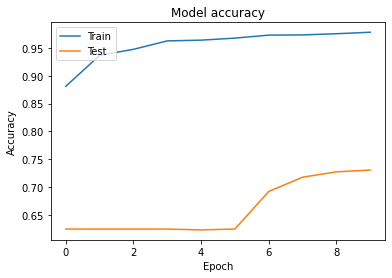

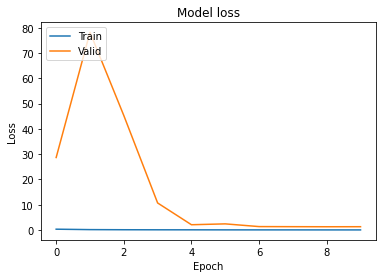

In [31]:
# Plot the accuracy values of training and testing sets
plt.plot(history_resnet_model.history['accuracy'])
plt.plot(history_resnet_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the loss values for training and testing sets
plt.plot(history_resnet_model.history['loss']) 
plt.plot(history_resnet_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

### 3.3 Mirrored Strategy with ResNet

In [32]:
# Training hyper-parameters
batch_size = 32
epochs = 10
data_augmentation = True

In [33]:
K.clear_session()

strategyr2 = tf.distribute.MirroredStrategy(devices = devices_names[:2])
with strategyr2.scope():
    resnet_model = Sequential()
    pretrained_model = tf.keras.applications.ResNet50(# Let try ResNet101
                        include_top = False,
                        input_shape = x_train_3.shape[1:],
                        pooling = 'max',
                        classes = 2,
                        weights = 'imagenet')

    resnet_model.add(pretrained_model)
    resnet_model.add(Flatten())
    resnet_model.add(Dense(512, activation = 'relu'))
    resnet_model.add(Dense(1, activation = 'sigmoid'))
    resnet_model.compile(optimizer = Adam(learning_rate = 0.00001), loss = 'binary_crossentropy', metrics = ['accuracy'])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [34]:
start2_ResNet = time.time()
# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    # Zifeng Edited
    history_resnet_model = resnet_model.fit(x_train_3, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test_3, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_3)

    # Fit the model on the batches generated by datagen.flow().
    # Zifeng Edited
    history_resnet_model = resnet_model.fit(datagen.flow(x_train_3, train_labels, batch_size=batch_size),
                        validation_data=(x_test_3, test_labels),
                        epochs=epochs, verbose=1, workers=10)

end2_ResNet = time.time()
tr2 = end2_ResNet - start2_ResNet
print("The elapsed time for the parallelized code when using two GPU is:",tr2)

Using real-time data augmentation.
Epoch 1/10
163/163 [==============================] - 72s 336ms/step - loss: 0.4386 - accuracy: 0.8600 - val_loss: 19.3793 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 52s 317ms/step - loss: 0.1784 - accuracy: 0.9385 - val_loss: 62.7201 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 52s 318ms/step - loss: 0.1614 - accuracy: 0.9484 - val_loss: 41.5706 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 52s 318ms/step - loss: 0.1197 - accuracy: 0.9592 - val_loss: 5.9509 - val_accuracy: 0.6090
Epoch 5/10
163/163 [==============================] - 52s 317ms/step - loss: 0.1083 - accuracy: 0.9617 - val_loss: 1.9383 - val_accuracy: 0.6362
Epoch 6/10
163/163 [==============================] - 52s 319ms/step - loss: 0.0811 - accuracy: 0.9732 - val_loss: 2.7592 - val_accuracy: 0.6266
Epoch 7/10
163/163 [==============================] - 52s 318ms/step - loss: 0.0872 - accura